# Group Z - Diamond Online Marketplace
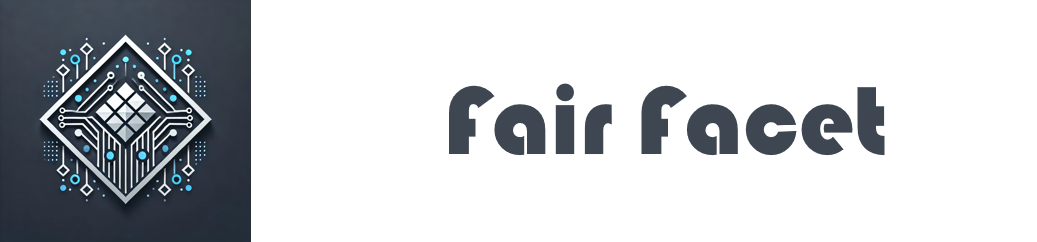

**Table of contents**<a id='toc0_'></a>       
- [1 Introduction: Data Cleaning and Exploratory Data Analysis](#toc1_1_)    
  - [Loading & Importing Required Libraries](#toc1_1_1_)    
  - [Data Curation and Initial Exploratory Data Analysis](#toc1_1_2_)    
  - [Thorough Exploratory Data Analysis](#toc1_1_3_)    
    - [Univariate Analysis of Factors Influencing Price](#toc1_1_3_1_)    
    - [Mulitvariate Analysis of Factors Influencing Price](#toc1_1_3_2_)    
  - [Define Function for Future Evaluation of Models](#toc1_1_4_)    
- [First Model: Linear Regression](#toc1_2_)    
  - [Create new dataset and split in test, validate, test](#toc1_2_1_)    
  - [Train first model](#toc1_2_2_)    
  - [Explore feature importance by looking at p-values of coefficients](#toc1_2_3_)    
  - [Check remaining coefficients after removing insignificant coefficients:](#toc1_2_4_)    
  - [Tune and validate model(s)](#toc1_2_5_)    
  - [Linear Regression With Polynomial Interaction Terms](#toc1_2_6_)    
    - [Between Numerical Only](#toc1_2_6_1_)    
    - [Between Numerical and Categorical](#toc1_2_6_2_)    
- [Second Model: Random Forrest](#toc1_3_)    
  - [Create and transform new dataset](#toc1_3_1_)    
  - [Without Feature Selection](#toc1_3_2_)    
    - [Train first model](#toc1_3_2_1_)    
    - [Tune and validate model](#toc1_3_2_2_)    
    - [Plot Actual vs. Predicted Price & Residuals](#toc1_3_2_3_)    
  - [With Feature Selection](#toc1_3_3_)    
    - [Select features automatically and create new subset](#toc1_3_3_1_)    
    - [Train first model](#toc1_3_3_2_)    
    - [Tune and validate model](#toc1_3_3_3_)    
    - [Plot Actual vs. Predicted Price & Residuals](#toc1_3_3_4_)    
- [Comparing the Models Performances](#toc1_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[1 Introduction: Data Cleaning and Exploratory Data Analysis](#toc0_)

### <a id='toc1_1_1_'></a>[Loading & Importing Required Libraries](#toc0_)

In [1]:
# Basic data manipulation libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# Statistical modeling
import statsmodels.api as sm

In [ ]:
file_path = 'diamonds (cleaned).csv'
df = pd.read_csv(file_path)

### <a id='toc1_1_2_'></a>[Data Curation and Initial Exploratory Data Analysis](#toc0_)

In [3]:
df.head()

Shape    Cut Color Clarity  Carat Weight  Length/Width Ratio  \
0  Cushion Modified  Ideal     F    VVS2          1.84                1.02   
1              Pear    NaN     E     VS1          1.20                1.65   
2              Oval    NaN     E     VS1          1.19                1.41   
3             Heart    NaN     D      IF          1.00                1.18   
4           Radiant    NaN     H     VS1          1.01                1.35   

   Depth %  Table %     Polish   Symmetry                        Girdle Culet  \
0     65.8     59.0  Excellent  Very Good               Medium to Thick   NaN   
1     62.5     58.0  Very Good  Very Good               Medium to Thick   NaN   
2     63.1     63.0  Very Good  Very Good               Medium to Thick   NaN   
3     61.7     58.0  Excellent  Excellent  Slightly Thick to Very Thick   NaN   
4     69.4     66.0  Excellent  Very Good                         Thick   NaN   

   Length  Width  Height  Price           Type Fluorescence  
0    7.09   6.95    4.57   2640  GIA Lab-Grown          NaN  
1    9.64   5.86    3.66   1070  GIA Lab-Grown          NaN  
2    8.44   6.00    3.79   1070  GIA Lab-Grown          NaN  
3    5.85   6.89    4.25   7110            GIA        Faint  
4    6.80   5.05    3.50   3050            GIA          NaN

- Shape: Geometric shape of the diamond.

- Cut: Quality grade of the diamond's cut.

- Color: Diamond color grade from D to H.

- Clarity: Clarity grade based on imperfections.

- Carat Weight: Weight of the diamond in carats.

- Length/Width Ratio: Proportion of length to width.

- Depth %: Diamond depth as a percentage of its width.

- Table %: Width of the top facet as a percentage.

- Polish: Surface finish quality of the diamond.

- Symmetry: Precision of the diamond’s shape.

- Girdle: Thickness of the diamond's edge.

- Culet: Size of the bottom facet.

- Length: Length of the diamond in millimeters.

- Width: Width of the diamond in millimeters.

- Height: Height of the diamond in millimeters.

- Price: Price of the diamond in US dollars ($).

- Type: Certification or origin type of the diamond.

- Fluorescence: UV fluorescence level of the diamond.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6485 entries, 0 to 6484
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Shape               6480 non-null   object 
 1   Cut                 2182 non-null   object 
 2   Color               6480 non-null   object 
 3   Clarity             6480 non-null   object 
 4   Carat Weight        6480 non-null   float64
 5   Length/Width Ratio  6480 non-null   float64
 6   Depth %             6478 non-null   float64
 7   Table %             6468 non-null   float64
 8   Polish              6465 non-null   object 
 9   Symmetry            6465 non-null   object 
 10  Girdle              6463 non-null   object 
 11  Culet               1891 non-null   object 
 12  Length              6465 non-null   float64
 13  Width               6465 non-null   float64
 14  Height              6465 non-null   float64
 15  Price               6485 non-null   int64  
 16  Type  

In [5]:
df.describe().T

count         mean          std      min      25%  \
Carat Weight        6480.0     1.235772     0.506647     1.00     1.01   
Length/Width Ratio  6480.0     1.329548     0.325707     1.00     1.02   
Depth %             6478.0    64.206499     4.773192    46.10    61.20   
Table %             6468.0    61.828541     4.760197    51.00    58.00   
Length              6465.0     7.663595     1.674665     5.18     6.33   
Width               6465.0     6.098323     1.151152     4.42     5.39   
Height              6465.0     3.885708     0.599420     2.67     3.46   
Price               6485.0  3529.391365  3280.439167  1010.00  1210.00   

                        50%      75%       max  
Carat Weight           1.03     1.20      9.38  
Length/Width Ratio     1.27     1.51      2.58  
Depth %               63.10    67.60     77.00  
Table %               61.00    65.00     78.00  
Length                 7.42     8.66     15.21  
Width                  5.64     6.61     14.88  
Height                 3.67     4.10      8.17  
Price               3320.00  4390.00  39460.00

In [6]:
numarical_value = df.select_dtypes(include=['float64', 'int64']).columns
categorical_value = df.select_dtypes(include=['object']).columns

missing_value = df.isnull().sum()
rows_with_missing_values = df.isnull().any(axis=1).sum()

missing_value["Rows with at least one missing value"] = rows_with_missing_values
missing_value

Shape                                      5
Cut                                     4303
Color                                      5
Clarity                                    5
Carat Weight                               5
Length/Width Ratio                         5
Depth %                                    7
Table %                                   17
Polish                                    20
Symmetry                                  20
Girdle                                    22
Culet                                   4594
Length                                    20
Width                                     20
Height                                    20
Price                                      0
Type                                       0
Fluorescence                            5264
Rows with at least one missing value    6482
dtype: int64

It shows that allmost all observations (6482/6485) have at least one missing variable.

**Handling Missing Data in Fluorescence Column**

In [7]:
# NULLs in Culet are caused by pandas transforming "None" to NULLS
df['Fluorescence'].replace(np.nan, "No Fluorescence", inplace=True)

C:\Users\jakob\AppData\Local\Temp\ipykernel_42636\3355034150.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fluorescence'].replace(np.nan, "No Fluorescence", inplace=True)


In [8]:
df['Culet'].value_counts()

Culet
Pointed       1861
Very Small      18
Small           10
Medium           1
Very Large       1
Name: count, dtype: int64

In [9]:
# NULLs in Culet are caused by pandas transforming "None" to NULLS
df['Culet'].replace(np.nan, "No Culet", inplace=True)

missing_value = df.isnull().sum()
rows_with_missing_values = df.isnull().any(axis=1).sum()

missing_value["Rows with at least one missing value"] = rows_with_missing_values
missing_value

C:\Users\jakob\AppData\Local\Temp\ipykernel_42636\3726514159.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Culet'].replace(np.nan, "No Culet", inplace=True)


Shape                                      5
Cut                                     4303
Color                                      5
Clarity                                    5
Carat Weight                               5
Length/Width Ratio                         5
Depth %                                    7
Table %                                   17
Polish                                    20
Symmetry                                  20
Girdle                                    22
Culet                                      0
Length                                    20
Width                                     20
Height                                    20
Price                                      0
Type                                       0
Fluorescence                               0
Rows with at least one missing value    4309
dtype: int64

In [10]:
# Count rows where "Length / Width Ratio" is NOT null 
# AND exactly one of "Length" or "Width" is available (not both, not none)
missing_length_or_width = df[
    df["Length/Width Ratio"].notnull() & 
    df["Length"].notnull() ^ df["Width"].notnull()  # XOR: Ensures only one of them is present
]

missing_length_or_width_count = missing_length_or_width.shape[0]
missing_length_or_width_count


0

In none of the rows the "Length / Width Ratio" is given and only Length OR Width is missing. So the missing values can not be calculated.

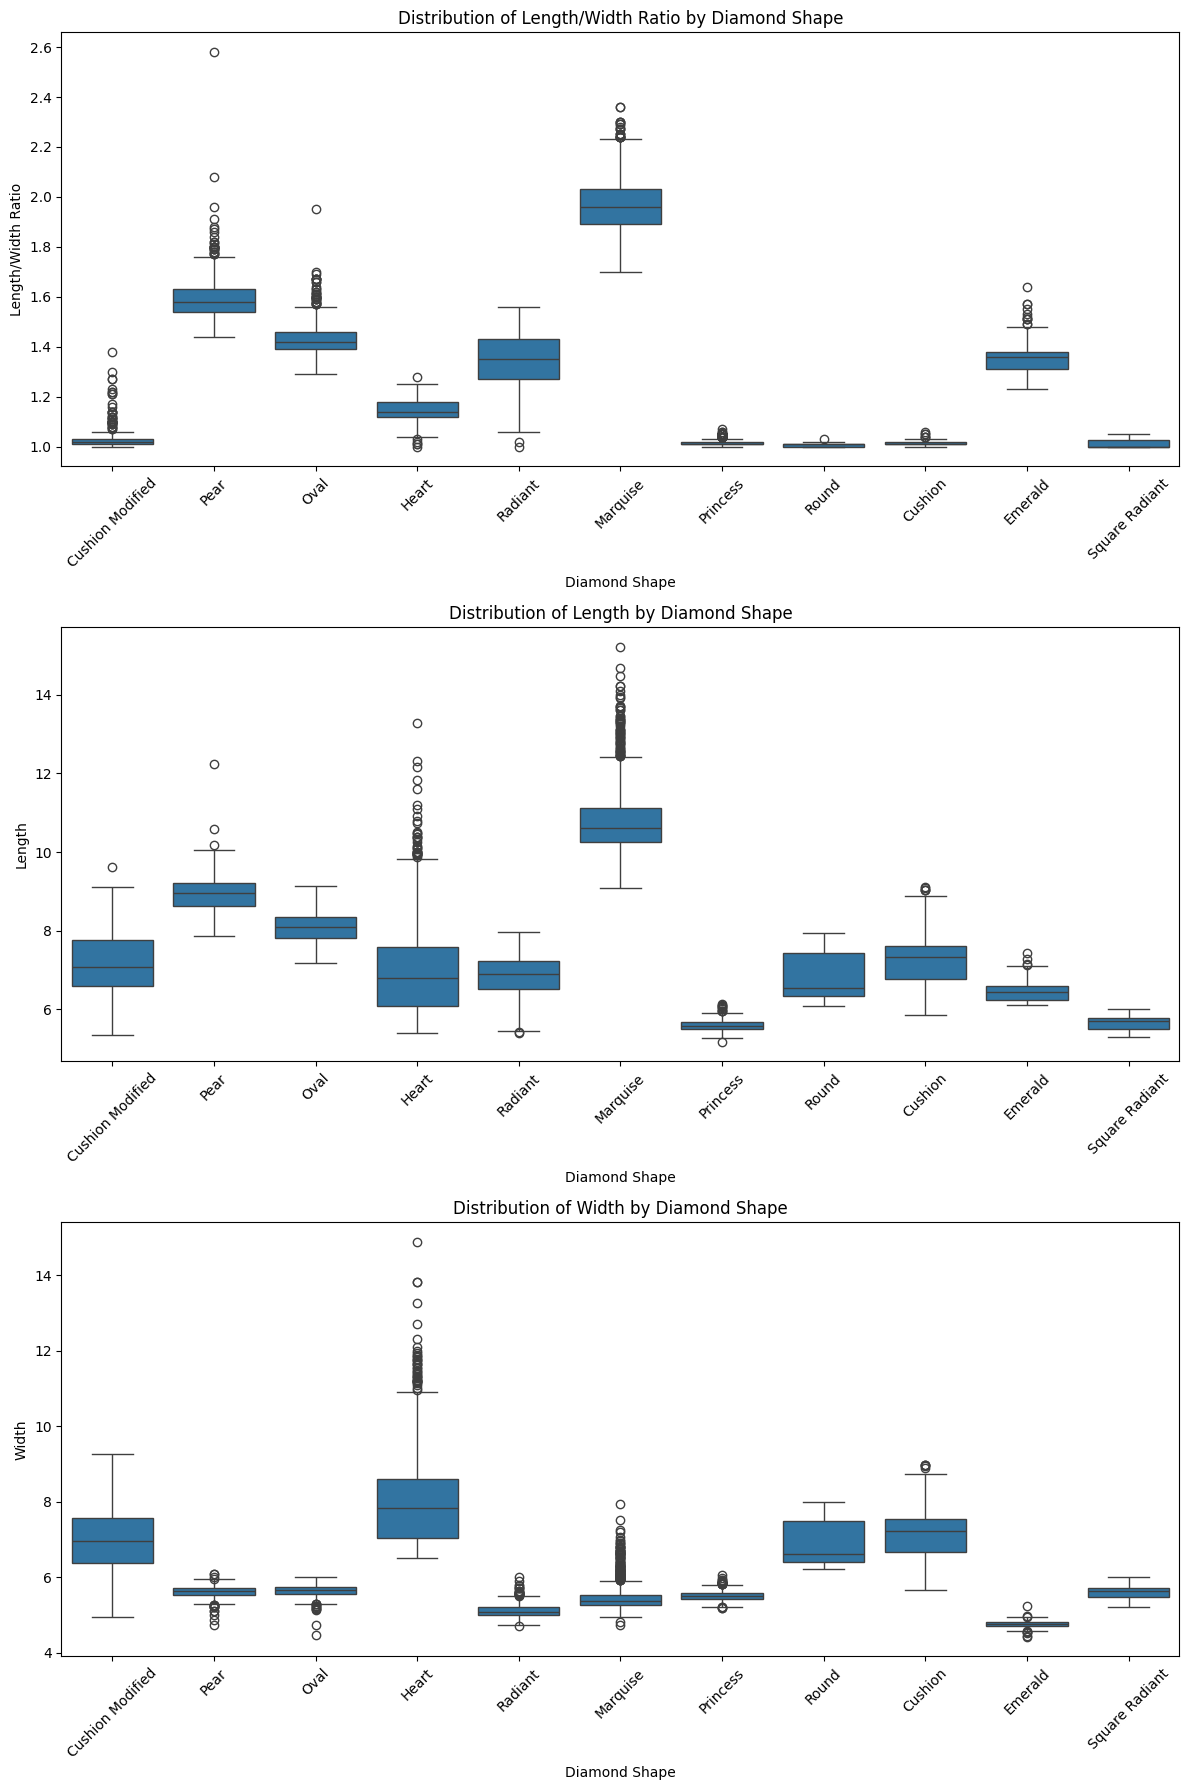

In [11]:
# Drop rows where "Shape", "Length/Width Ratio", "Length", or "Width" is missing
df_filtered_ratio = df.dropna(subset=["Shape", "Length/Width Ratio"])
df_filtered_len_wid = df.dropna(subset=["Shape", "Length", "Width"])

# Create a figure with three subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Boxplot for Length/Width Ratio
sns.boxplot(data=df_filtered_ratio, x="Shape", y="Length/Width Ratio", ax=axes[0])
axes[0].set_title("Distribution of Length/Width Ratio by Diamond Shape")
axes[0].set_xlabel("Diamond Shape")
axes[0].set_ylabel("Length/Width Ratio")
axes[0].tick_params(axis='x', rotation=45)

# Boxplot for Length
sns.boxplot(data=df_filtered_len_wid, x="Shape", y="Length", ax=axes[1])
axes[1].set_title("Distribution of Length by Diamond Shape")
axes[1].set_xlabel("Diamond Shape")
axes[1].set_ylabel("Length")
axes[1].tick_params(axis='x', rotation=45)

# Boxplot for Width
sns.boxplot(data=df_filtered_len_wid, x="Shape", y="Width", ax=axes[2])
axes[2].set_title("Distribution of Width by Diamond Shape")
axes[2].set_xlabel("Diamond Shape")
axes[2].set_ylabel("Width")
axes[2].tick_params(axis='x', rotation=45)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


It looks like there are clear patterns between shape, length, width and len/wid ratio. So it might be a valid assumption to replace length and width with the means of their shapes, while mainting plausibility with the
len/wid ratio.

In [12]:
# Step 1: Compute mean Length, Width, and Depth % per Shape
shape_means = df.groupby("Shape")[["Length", "Width", "Depth %"]].mean().reset_index()

# Step 2: Merge mean values back into the dataframe
df = df.merge(shape_means, on="Shape", suffixes=("", "_mean"), how="left")

# Step 3: Identify rows where Length, Width, and Height are missing, but Ratio and Depth % are given
missing_len_wid_ht = (
    df["Length"].isnull() & 
    df["Width"].isnull() & 
    df["Height"].isnull() & 
    df["Length/Width Ratio"].notnull() & 
    df["Depth %"].notnull()
)

# Step 4: Estimate missing Width using Shape-Based Mean Width
df.loc[missing_len_wid_ht, "Width"] = df["Width_mean"]

# Step 5: Compute missing Length using Width and Ratio
df.loc[missing_len_wid_ht, "Length"] = df["Width"] * df["Length/Width Ratio"]

# Step 6: Compute missing Height using Depth % formula
df.loc[missing_len_wid_ht, "Height"] = (df["Depth %"] / 100) * df["Width"]

# Step 7: Drop auxiliary mean columns
df.drop(columns=["Length_mean", "Width_mean", "Depth %_mean"], inplace=True)

# Step 8: Drop rows where Length is still missing (since Length, Width, and Height are always missing together)
df = df.dropna(subset=["Length"])


In [13]:
missing_value = df.isnull().sum()
rows_with_missing_values = df.isnull().any(axis=1).sum()

missing_value["Rows with at least one missing value"] = rows_with_missing_values
missing_value

Shape                                      0
Cut                                     4298
Color                                      0
Clarity                                    0
Carat Weight                               0
Length/Width Ratio                         0
Depth %                                    0
Table %                                   10
Polish                                    13
Symmetry                                  13
Girdle                                    15
Culet                                      0
Length                                     0
Width                                      0
Height                                     0
Price                                      0
Type                                       0
Fluorescence                               0
Rows with at least one missing value    4302
dtype: int64

In [14]:
# Missing values in "Cut" don't seem to explain anything, thus dropping the column
df = df.drop(columns=["Cut"])


In [15]:
df["Girdle"].value_counts()

Girdle
Medium to Slightly Thick             1713
Slightly Thick to Thick               986
Medium to Thick                       672
Thick to Very Thick                   585
Medium                                582
Slightly Thick to Very Thick          526
Medium to Very Thick                  229
Slightly Thick                        224
Thick                                 199
Thin to Medium                        165
Thin to Slightly Thick                120
Thin to Thick                          95
Very Thick                             85
Thick to Extremely Thick               58
Very Thick to Extremely Thick          46
Thin to Very Thick                     41
Slightly Thick to Extremely Thick      38
Medium to Extremely Thick              30
Thin                                   16
Very Thin to Very Thick                14
Thin to Extremely Thick                13
Extremely Thick                         8
Very Thin to Thick                      8
Very Thin to Slightly Thick

The Girdle variable originally had many overlapping categories with inconsistent ranges. 
To simplify, we grouped ranges into the closest matching thickness level, reducing complexity while preserving meaningful distinctions.








In [16]:
print(df["Girdle"].unique())
print(len(df["Girdle"].unique()))

['Medium to Thick' 'Slightly Thick to Very Thick' 'Thick'
 'Slightly Thick to Thick' 'Medium to Slightly Thick'
 'Medium to Very Thick' 'Slightly Thick' 'Medium' 'Thick to Very Thick'
 'Very Thick' 'Thin to Medium' 'Thin to Thick' 'Medium to Extremely Thick'
 'Slightly Thick to Extremely Thick' 'Very Thin to Very Thick'
 'Thin to Slightly Thick' 'Thick to Extremely Thick' nan
 'Thin to Very Thick' 'Slightly Thick to Slightly Thick'
 'Very Thin to Thick' 'Thin' 'Very Thick to Extremely Thick'
 'Thin to Extremely Thick' 'Extremely Thick' 'Extremely Thin to Medium'
 'Very Thin to Extremely Thick' 'Very Thin to Slightly Thick'
 'Extremely Thin to Extremely Thick' 'Extremely Thin to Slightly Thick']
30


In [17]:
# Define the precise mapping for Girdle values
girdle_mapping = {
    "Medium to Thick": "Slightly Thick",
    "Slightly Thick to Very Thick": "Thick",
    "Slightly Thick to Thick": "Slightly Thick",
    "Medium to Slightly Thick": "Medium",
    "Medium to Very Thick": "Slightly Thick",
    "Thick to Very Thick": "Thick",
    "Thin to Medium": "Slightly Thin",
    "Thin to Thick": "Slightly Thin",
    "Medium to Extremely Thick": "Thick",
    "Slightly Thick to Extremely Thick": "Thick",
    "Very Thin to Very Thick": "Medium",
    "Thin to Slightly Thick": "Slightly Thin",
    "Thick to Extremely Thick": "Very Thick",
    "Thin to Very Thick": "Slightly Thick",
    "Slightly Thick to Slightly Thick": "Slightly Thick",
    "Very Thin to Thick": "Slightly Thin",
    "Very Thick to Extremely Thick": "Very Thick",
    "Thin to Extremely Thick": "Slightly Thick",
    "Extremely Thin to Medium": "Thin",
    "Very Thin to Extremely Thick": "Medium",
    "Very Thin to Slightly Thick": "Slightly Thin",
    "Extremely Thin to Extremely Thick": "Medium",
    "Extremely Thin to Slightly Thick": "Thin",
    "Thick": "Thick",
    "Slightly Thick": "Slightly Thick",
    "Medium": "Medium",
    "Very Thick": "Very Thick",
    "Thin": "Thin",
    "Extremely Thick": "Extremely Thick"
}

# Apply the mapping while keeping NULL values unchanged
df["Girdle"] = df["Girdle"].map(lambda x: girdle_mapping[x] if x in girdle_mapping else x)



In [18]:
df["Girdle"].unique()

array(['Slightly Thick', 'Thick', 'Medium', 'Very Thick', 'Slightly Thin',
       nan, 'Thin', 'Extremely Thick'], dtype=object)

In [19]:
missing_value = df.isnull().sum()
rows_with_missing_values = df.isnull().any(axis=1).sum()

missing_value["Rows with at least one missing value"] = rows_with_missing_values
missing_value

Shape                                    0
Color                                    0
Clarity                                  0
Carat Weight                             0
Length/Width Ratio                       0
Depth %                                  0
Table %                                 10
Polish                                  13
Symmetry                                13
Girdle                                  15
Culet                                    0
Length                                   0
Width                                    0
Height                                   0
Price                                    0
Type                                     0
Fluorescence                             0
Rows with at least one missing value    15
dtype: int64

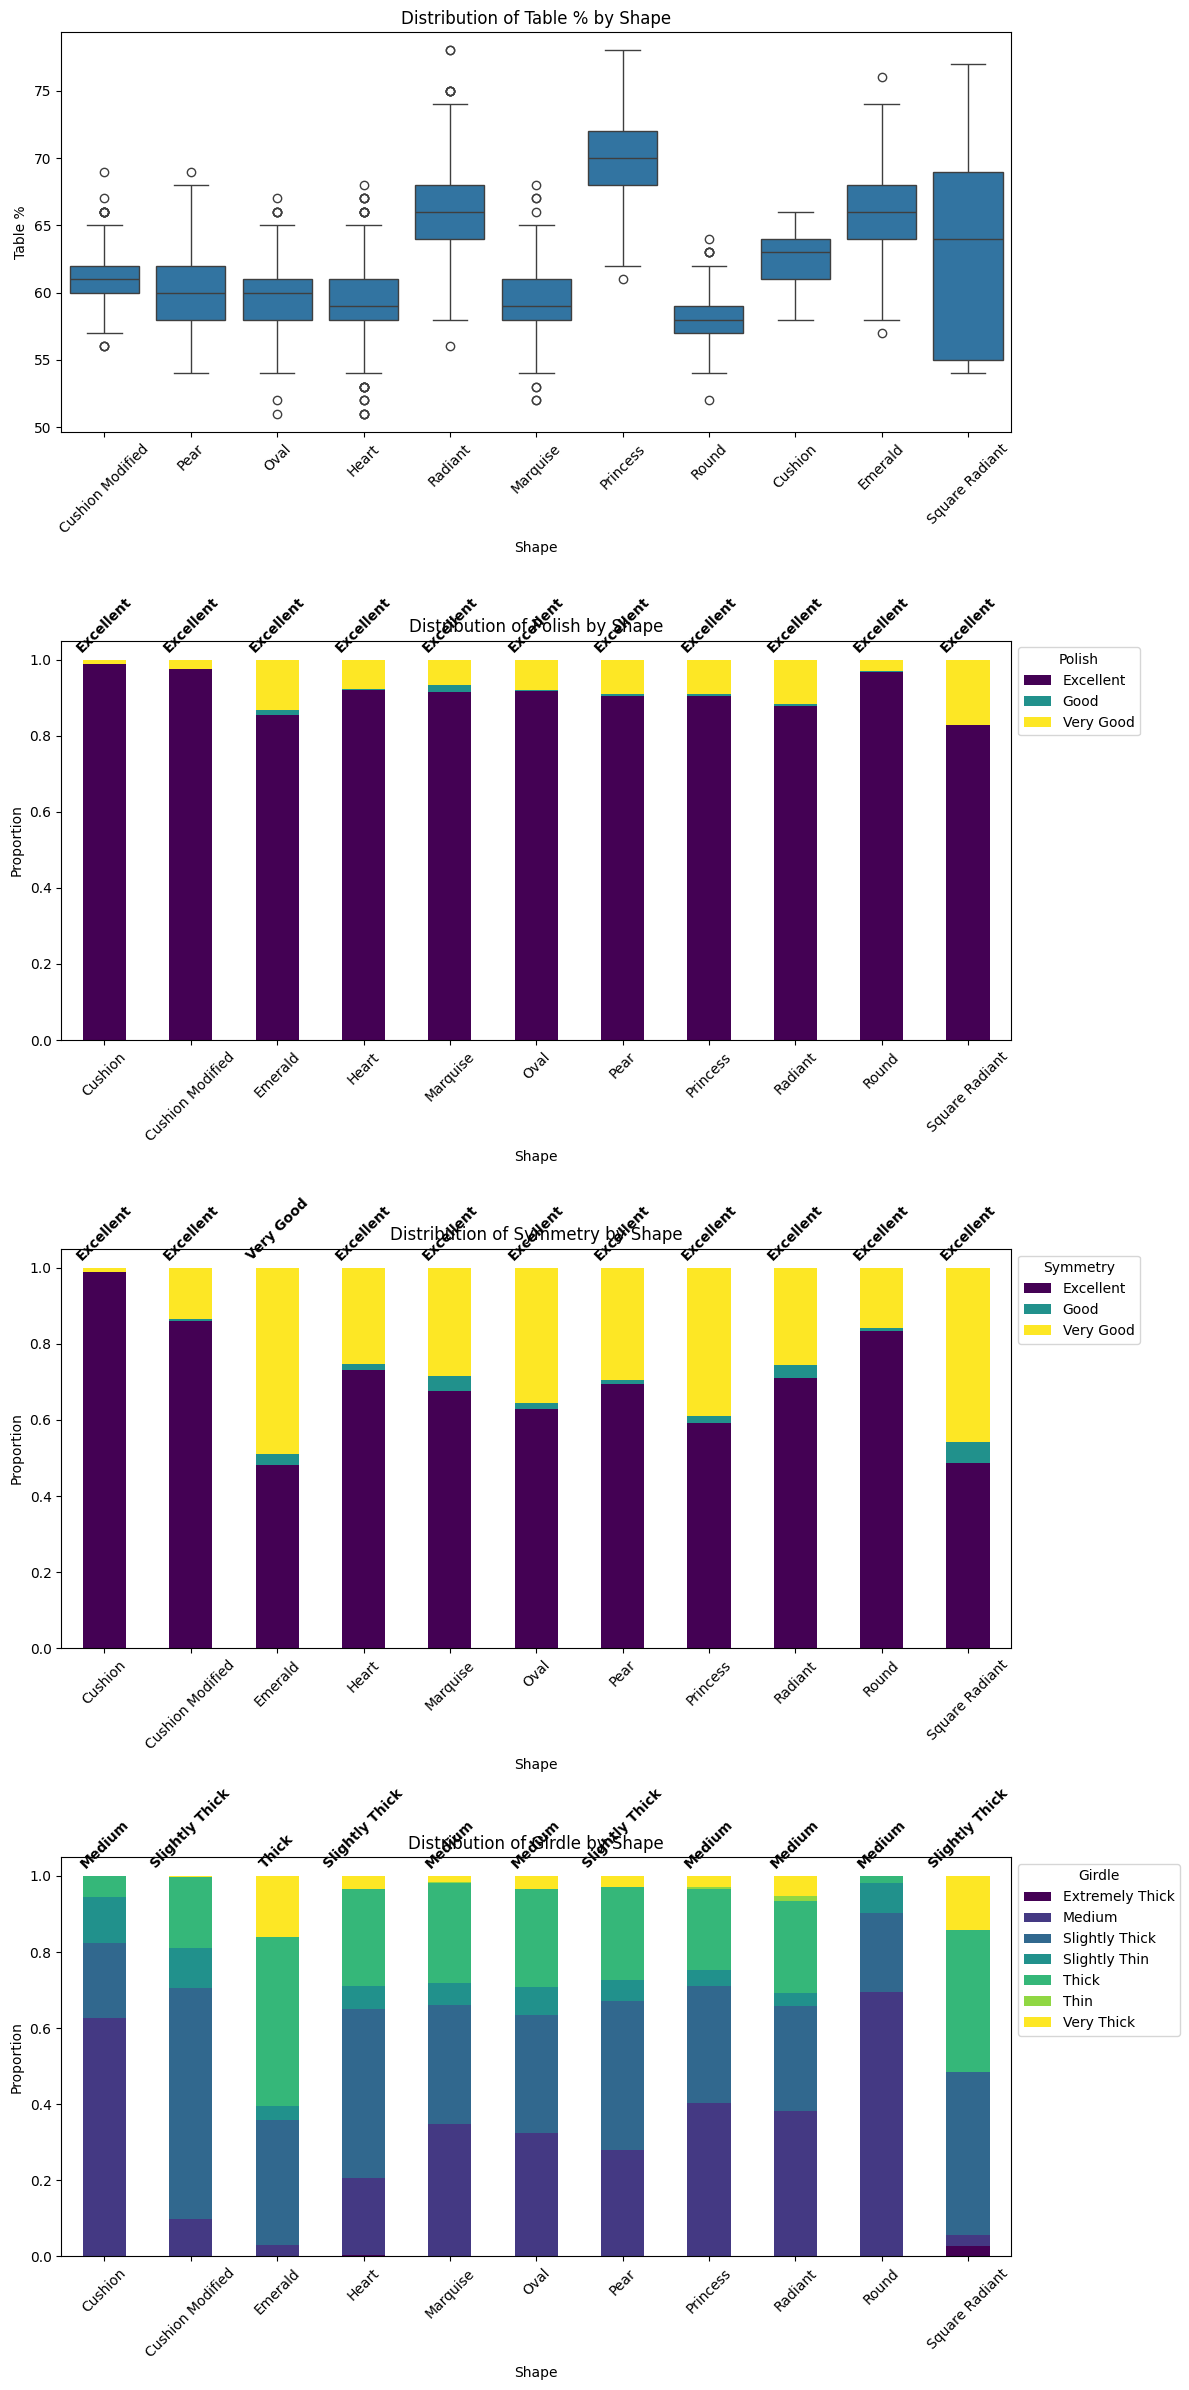

In [20]:
# Define categorical attributes
categorical_attributes = ["Polish", "Symmetry", "Girdle"]

# Set figure size
fig, axes = plt.subplots(4, 1, figsize=(12, 24))  # 4 rows to include Table % boxplot

# Boxplot for Table % by Shape
sns.boxplot(data=df, x="Shape", y="Table %", ax=axes[0])
axes[0].set_title("Distribution of Table % by Shape")
axes[0].set_xlabel("Shape")
axes[0].set_ylabel("Table %")
axes[0].tick_params(axis='x', rotation=45)

# Create stacked bar charts for each categorical attribute
for i, attr in enumerate(categorical_attributes):
    # Count values for each shape
    category_counts = df.groupby("Shape")[attr].value_counts(normalize=True).unstack().fillna(0)
    
    # Plot stacked bar chart
    category_counts.plot(kind="bar", stacked=True, ax=axes[i+1], colormap="viridis")

    # Display mode for each shape
    mode_values = df.groupby("Shape")[attr].agg(lambda x: x.mode()[0])  # Get first mode if multiple
    for j, shape in enumerate(mode_values.index):
        axes[i+1].text(j, 1.02, mode_values[shape], ha='center', fontsize=10, 
                       color="black", fontweight="bold", rotation=45)

    axes[i+1].set_title(f"Distribution of {attr} by Shape")
    axes[i+1].set_xlabel("Shape")
    axes[i+1].set_ylabel("Proportion")
    axes[i+1].legend(title=attr, bbox_to_anchor=(1, 1))
    axes[i+1].tick_params(axis='x', rotation=45)

# Adjust layout for better visibility
plt.tight_layout()
plt.show()


In [21]:
# Replace NaNs in "Table %" with the median per Shape
df["Table %"].fillna(df.groupby("Shape")["Table %"].transform("median"), inplace=True)

# Replace NaNs in "Polish", "Symmetry", and "Girdle" with the mode per Shape
for col in ["Polish", "Symmetry", "Girdle"]:
    df[col].fillna(df.groupby("Shape")[col].transform(lambda x: x.mode()[0]), inplace=True)

missing_value = df.isnull().sum()
rows_with_missing_values = df.isnull().any(axis=1).sum()

missing_value["Rows with at least one missing value"] = rows_with_missing_values
missing_value

C:\Users\jakob\AppData\Local\Temp\ipykernel_42636\793293874.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Table %"].fillna(df.groupby("Shape")["Table %"].transform("median"), inplace=True)
C:\Users\jakob\AppData\Local\Temp\ipykernel_42636\793293874.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

Shape                                   0
Color                                   0
Clarity                                 0
Carat Weight                            0
Length/Width Ratio                      0
Depth %                                 0
Table %                                 0
Polish                                  0
Symmetry                                0
Girdle                                  0
Culet                                   0
Length                                  0
Width                                   0
Height                                  0
Price                                   0
Type                                    0
Fluorescence                            0
Rows with at least one missing value    0
dtype: int64

In [22]:
df.reset_index(drop=True, inplace=True)

In [23]:
# Create a new column for Price per Carat, as this is the variable of interest of the buyer.
# He will allways now the weight of the diamond he is thinking to buy. Carat (Weight) will 
# be kept as an explanatory variable nevertheless.

df["Price per Carat"] = df["Price"] / df["Carat Weight"]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6478 entries, 0 to 6477
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Shape               6478 non-null   object 
 1   Color               6478 non-null   object 
 2   Clarity             6478 non-null   object 
 3   Carat Weight        6478 non-null   float64
 4   Length/Width Ratio  6478 non-null   float64
 5   Depth %             6478 non-null   float64
 6   Table %             6478 non-null   float64
 7   Polish              6478 non-null   object 
 8   Symmetry            6478 non-null   object 
 9   Girdle              6478 non-null   object 
 10  Culet               6478 non-null   object 
 11  Length              6478 non-null   float64
 12  Width               6478 non-null   float64
 13  Height              6478 non-null   float64
 14  Price               6478 non-null   int64  
 15  Type                6478 non-null   object 
 16  Fluore

### <a id='toc1_1_3_'></a>[Thorough Exploratory Data Analysis](#toc0_)

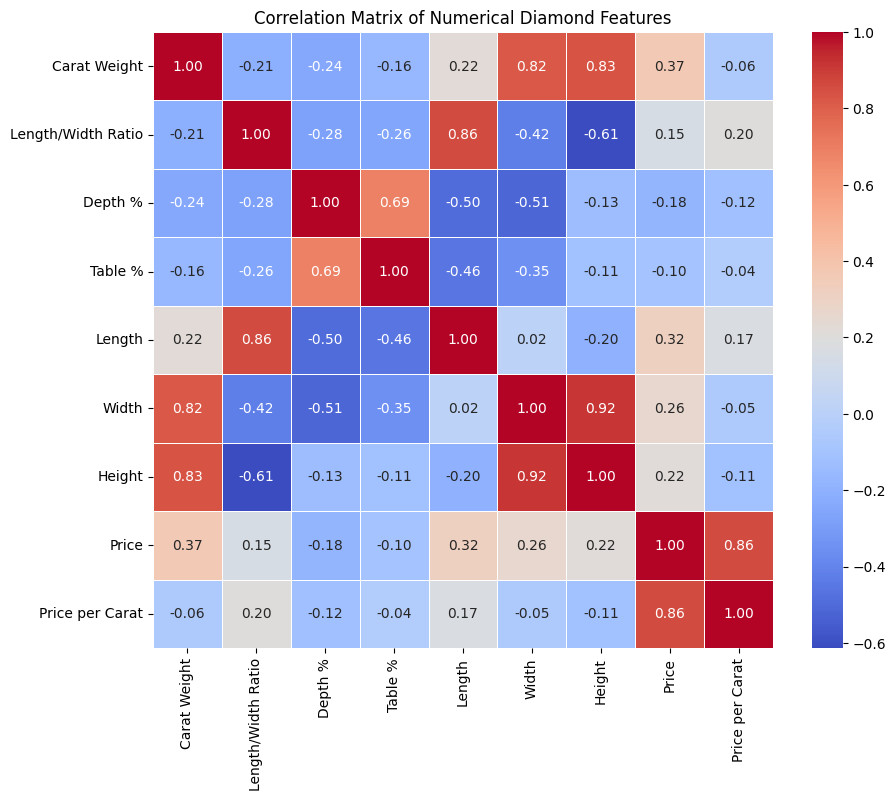

In [ ]:
# Compute correlation matrix for numerical columns only
corr_matrix = df.select_dtypes(include=["number"]).corr()

# Set figure size
plt.figure(figsize=(10, 8))

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Set title
plt.title("Correlation Matrix of Numerical Diamond Features")

# Show plot
plt.show()


#### <a id='toc1_1_3_1_'></a>[Univariate Analysis of Factors Influencing Price](#toc0_)

In [26]:
# Count the number of unique values for each categorical variable
unique_counts = df.select_dtypes(include=["object"]).nunique()
print(unique_counts)

Shape           11
Color            5
Clarity          6
Polish           3
Symmetry         3
Girdle           7
Culet            6
Type             3
Fluorescence     4
dtype: int64


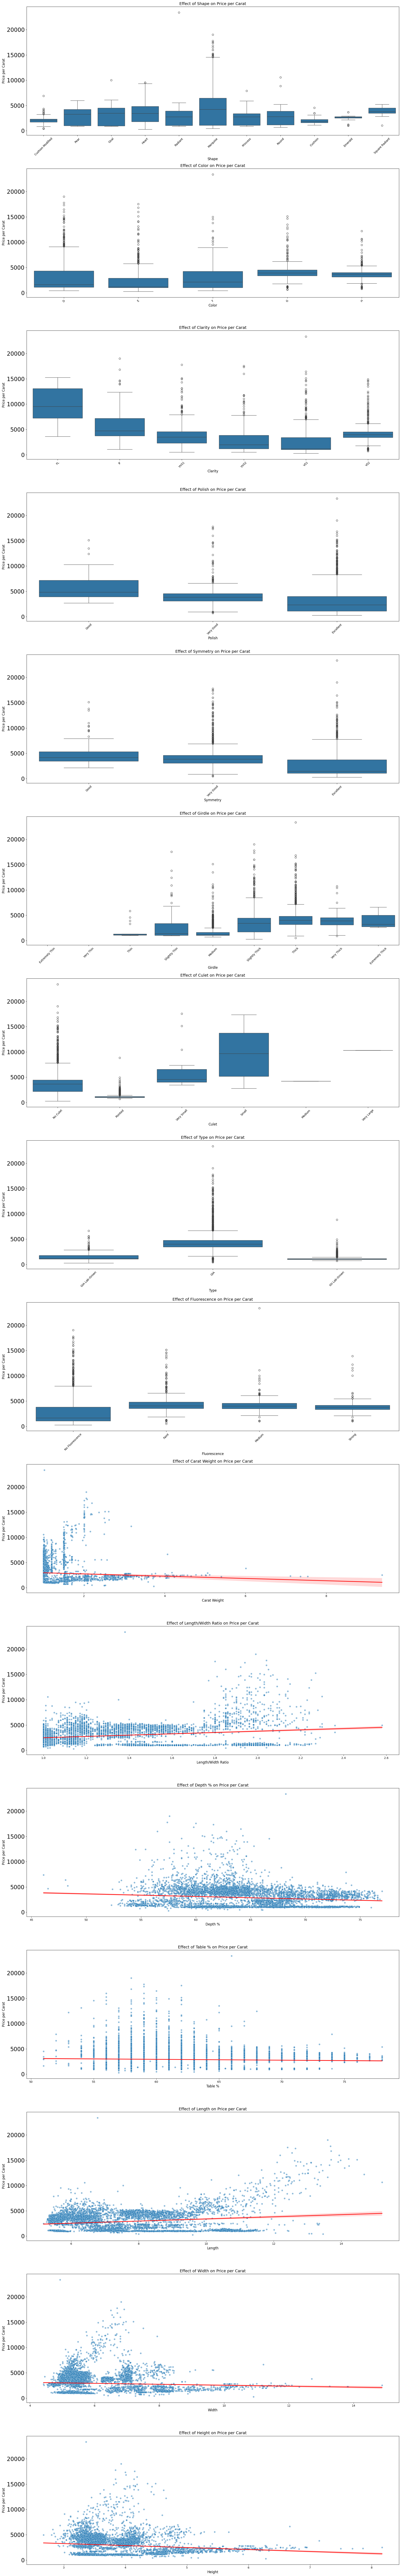

In [27]:
# Define ordered categories where applicable
ordered_categories = {
    "Girdle": ["Extremely Thin", "Very Thin", "Thin", "Slightly Thin", "Medium", "Slightly Thick", "Thick", "Very Thick", "Extremely Thick"],
    "Polish": ["Good", "Very Good", "Excellent"],
    "Symmetry": ["Good", "Very Good", "Excellent"],
    "Clarity": ["FL", "IF", "VVS1", "VVS2", "VS1", "VS2"],  # Increasing inclusions
    "Color": ["D", "E", "F", "G", "H"],  # D is the most colorless
    "Culet": ["No Culet", "Pointed", "Very Small", "Small", "Medium", "Very Large"],  # Increasing size
    "Fluorescence": ["No Fluorescence", "Faint", "Medium", "Strong"]  # Increasing fluorescence effect
}

# Define variables
categorical_vars = ["Shape", "Color", "Clarity", "Polish", "Symmetry", "Girdle", "Culet", "Type", "Fluorescence"]
numerical_vars = ["Carat Weight", "Length/Width Ratio", "Depth %", "Table %", "Length", "Width", "Height"]

# Calculate total number of subplots needed (one column layout)
total_vars = len(categorical_vars) + len(numerical_vars)
fig, axes = plt.subplots(total_vars, 1, figsize=(20, total_vars * 8))  # Increase y-axis space

# Plot categorical variables as boxplots with proper ordering
for i, var in enumerate(categorical_vars):
    if var in ordered_categories:
        sns.boxplot(data=df, x=pd.Categorical(df[var], categories=ordered_categories[var], ordered=True), y="Price per Carat", ax=axes[i])
    else:
        sns.boxplot(data=df, x=var, y="Price per Carat", ax=axes[i])
    
    axes[i].set_title(f"Effect of {var} on Price per Carat", fontsize=14)
    axes[i].set_xlabel(var, fontsize=12)
    axes[i].set_ylabel("Price per Carat", fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].tick_params(axis='y', labelsize=20)  # Increase y-axis label size

# Plot numerical variables as scatter plots
for i, var in enumerate(numerical_vars):
    index = len(categorical_vars) + i  # Continue plotting in the same column
    sns.scatterplot(data=df, x=var, y="Price per Carat", alpha=0.5, ax=axes[index])
    sns.regplot(data=df, x=var, y="Price per Carat", scatter=False, ax=axes[index], color="red")
    axes[index].set_title(f"Effect of {var} on Price per Carat", fontsize=14)
    axes[index].set_xlabel(var, fontsize=12)
    axes[index].set_ylabel("Price per Carat", fontsize=12)
    axes[index].tick_params(axis='y', labelsize=20)  # Increase y-axis label size

# Adjust layout
plt.tight_layout()
plt.show()


The univariate analysis highlights which variables might influence price per carat. However, for numerical variables, multiple interacting effects seem to impact price differently. Therefore, the following section will conduct a short EDA on multivariate effects on price.

#### <a id='toc1_1_3_2_'></a>[Mulitvariate Analysis of Factors Influencing Price](#toc0_)

**Numerical Variables & Type - Effect on Price per Charat**

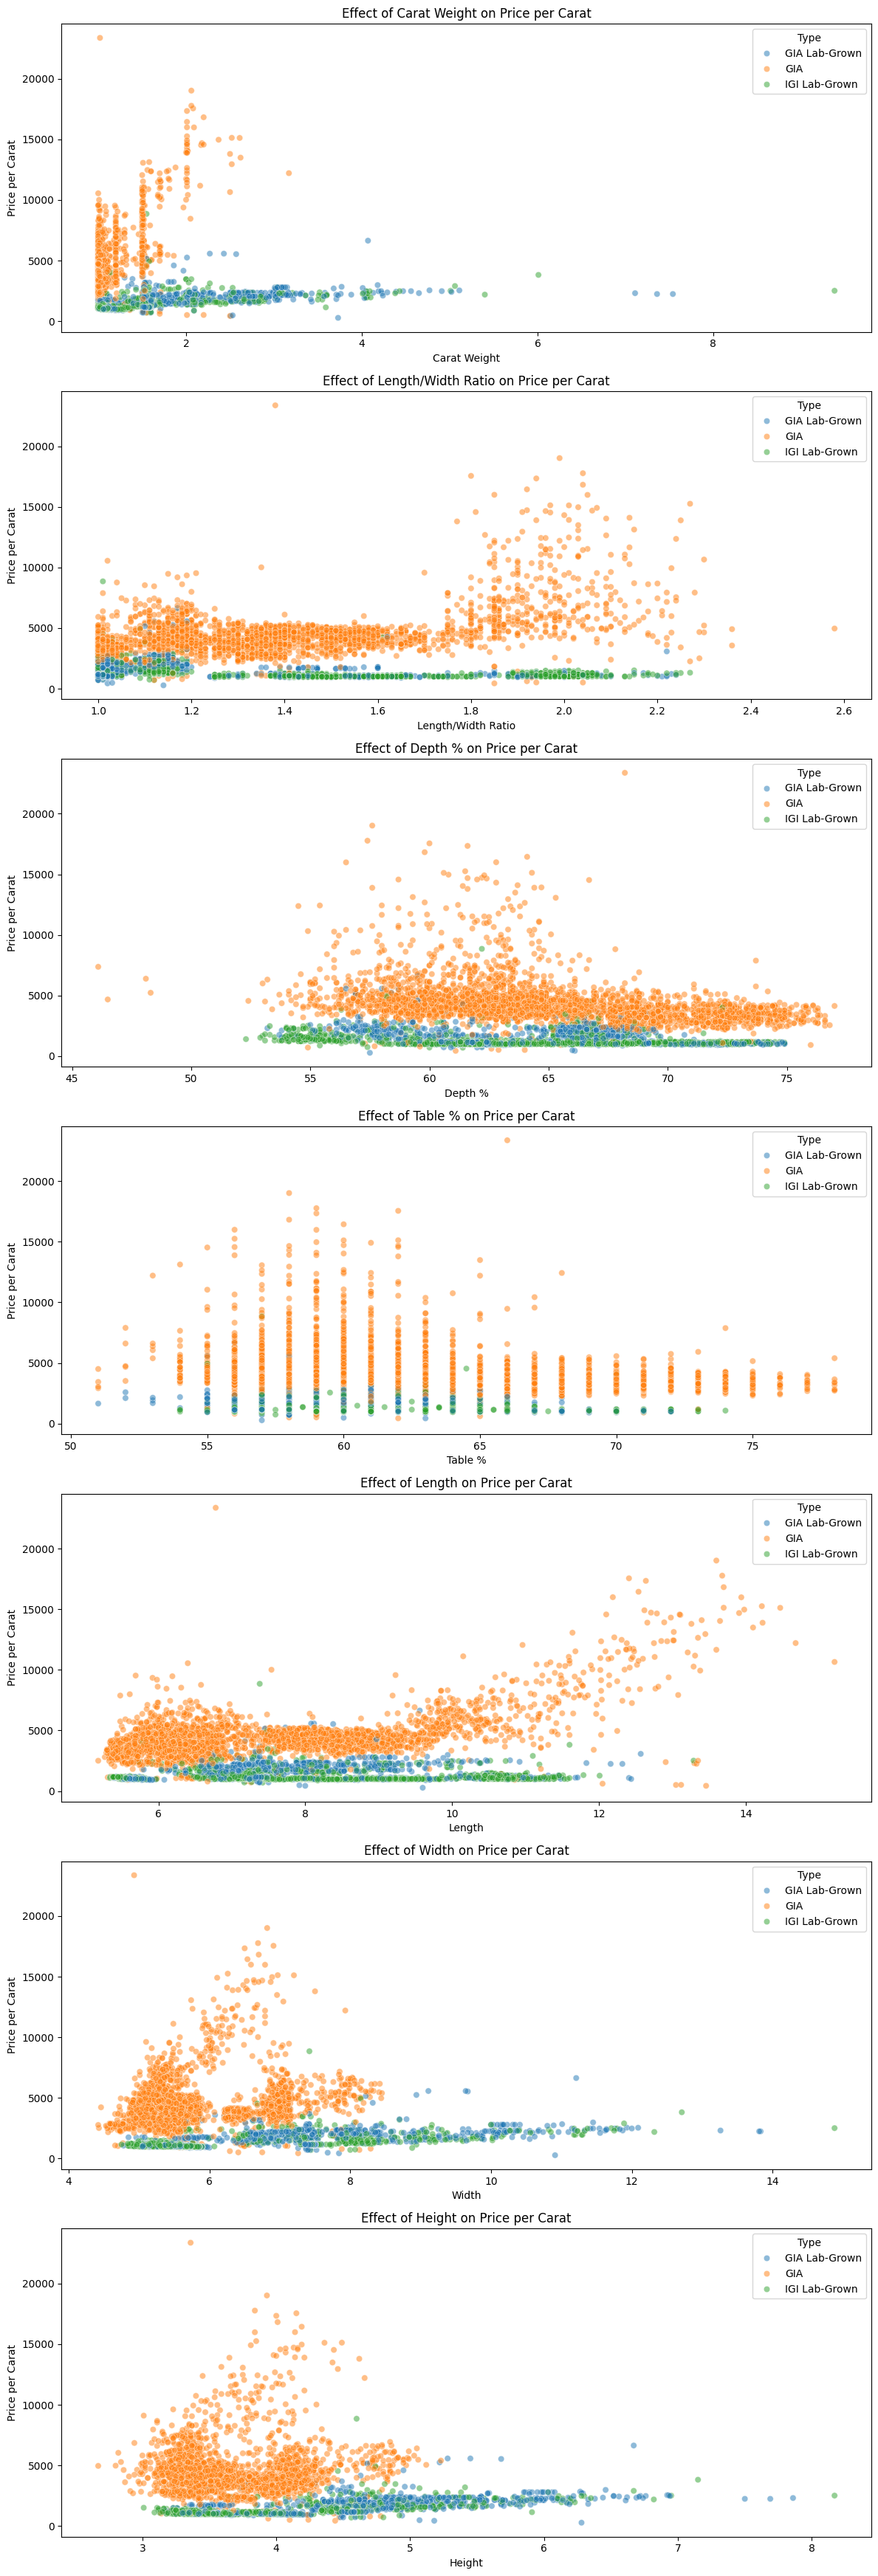

In [28]:
# Define numerical variables
numerical_vars = ["Carat Weight", "Length/Width Ratio", "Depth %", "Table %", "Length", "Width", "Height"]

# Set figure size
fig, axes = plt.subplots(len(numerical_vars), 1, figsize=(12, len(numerical_vars) * 5))

# Create scatter plots for each numerical variable vs. Price per Carat, grouped by Type
for i, var in enumerate(numerical_vars):
    sns.scatterplot(data=df, x=var, y="Price per Carat", hue="Type", alpha=0.5, ax=axes[i])
    axes[i].set_title(f"Effect of {var} on Price per Carat")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Price per Carat")

# Adjust layout
plt.tight_layout()
plt.show()


**Numerical Variables & Shape - Effect on Price per Charat**

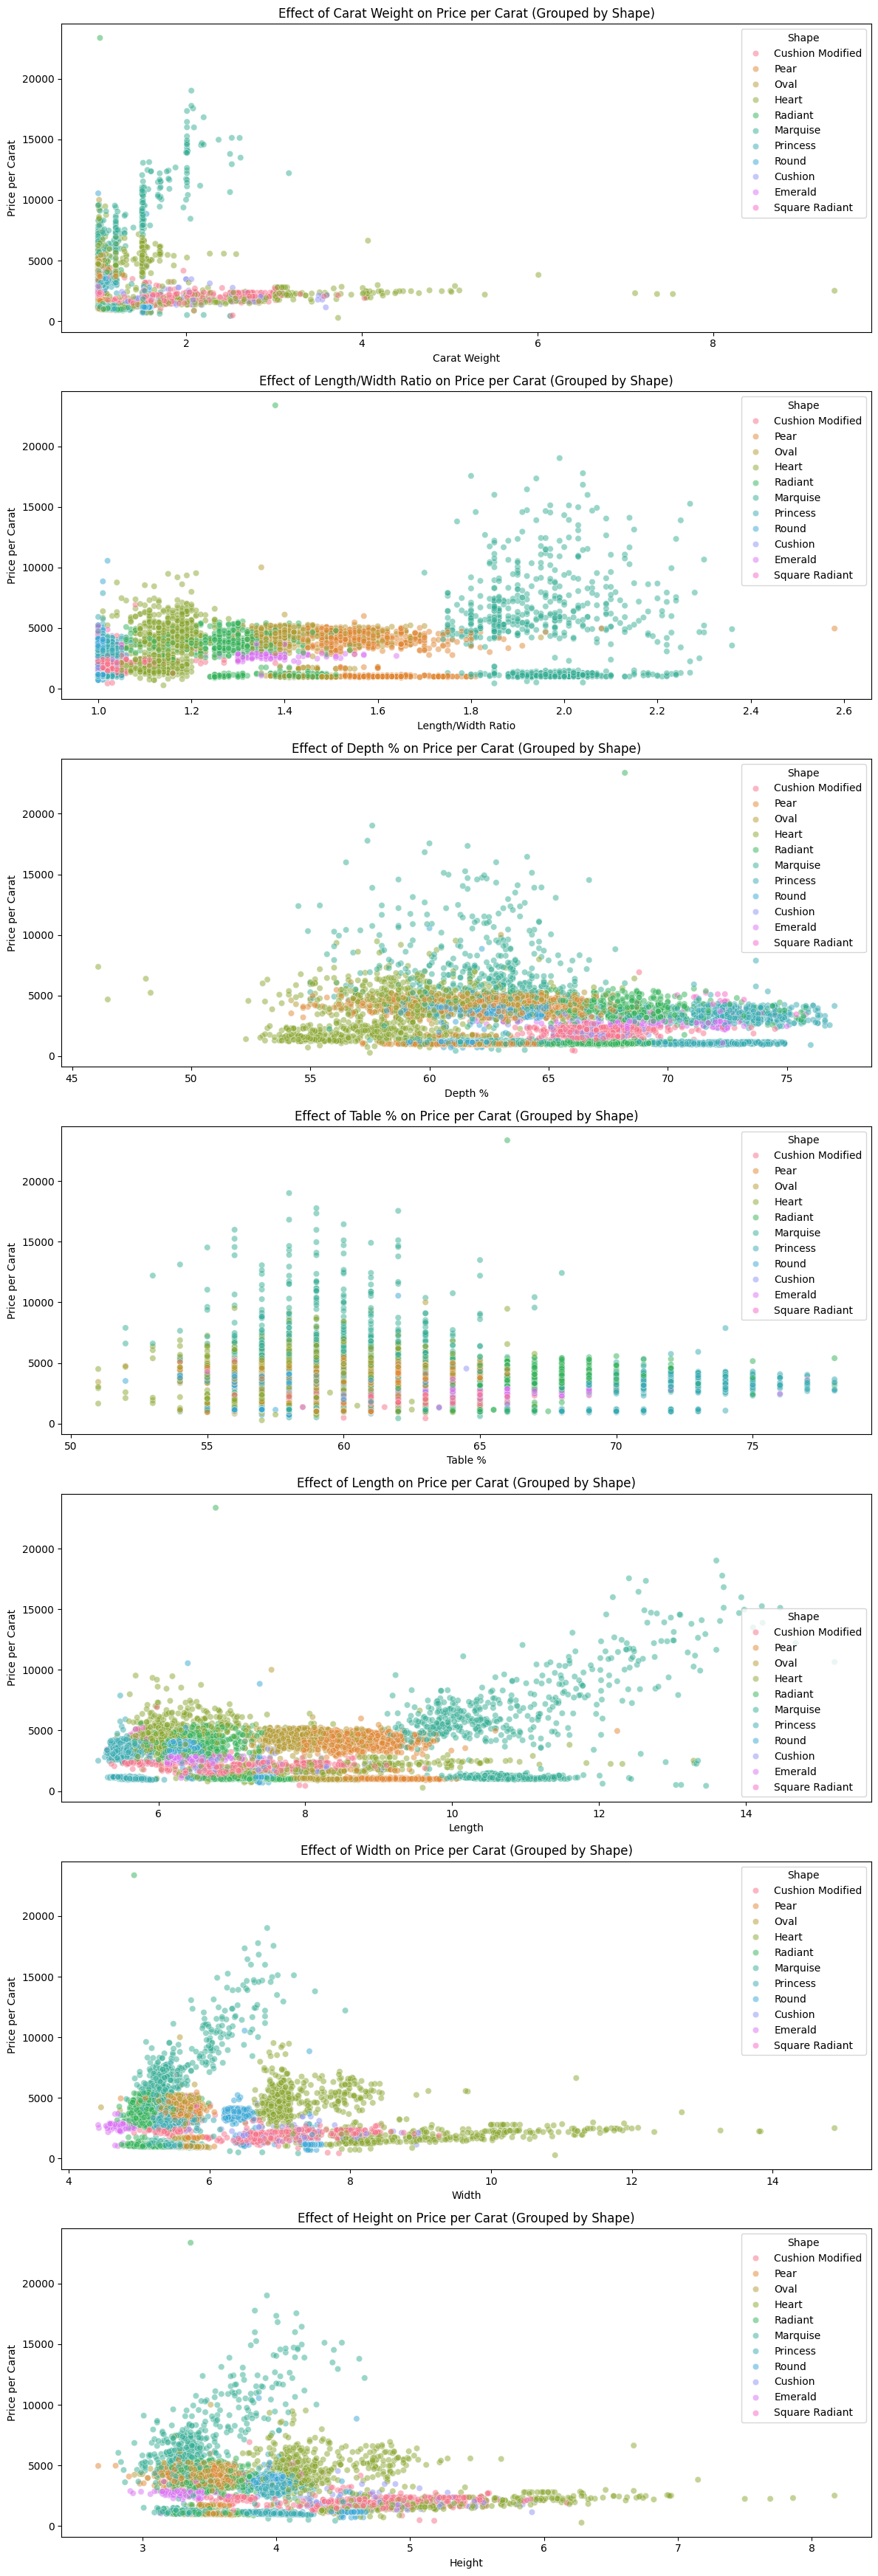

In [29]:
# Define numerical variables
numerical_vars = ["Carat Weight", "Length/Width Ratio", "Depth %", "Table %", "Length", "Width", "Height"]

# Set figure size
fig, axes = plt.subplots(len(numerical_vars), 1, figsize=(12, len(numerical_vars) * 5))

# Create scatter plots for each numerical variable vs. Price per Carat, grouped by Shape
for i, var in enumerate(numerical_vars):
    sns.scatterplot(data=df, x=var, y="Price per Carat", hue="Shape", alpha=0.5, ax=axes[i])
    axes[i].set_title(f"Effect of {var} on Price per Carat (Grouped by Shape)")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Price per Carat")

# Adjust layout
plt.tight_layout()
plt.show()


When using Shape and Type of the diamonds in combination, the effects of different variables on price per carat become much clearer for each type of diamond. In the following steps, these interactions may be considered for feature selection and interaction terms to improve the model.

### <a id='toc1_1_4_'></a>[Define Function for Future Evaluation of Models](#toc0_)

In [ ]:
def evaluate_model_performance(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)

    print(f"Test MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²: {r2:.4f}")
    print(f"MAPE: {mape:.4f}")

    return {
        "MSE": mse,
        "MAE": mae,
        "RMSE": rmse,
        "R²": r2,
        "MAPE": mape
    }



## <a id='toc1_2_'></a>[2 First Model: Linear Regression](#toc0_)

### <a id='toc1_2_1_'></a>[Create new dataset and split in test, validate, test](#toc0_)

In [ ]:
# Create a new DataFrame for linear regression (drop 'Price' and keep 'Price per Carat' as target)
df_lin = df.drop(columns=["Price"]).copy()

# Define features (X) and target variable (y)
X = df_lin.drop(columns=["Price per Carat"])
y = df_lin["Price per Carat"]

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()
numerical_features = X.select_dtypes(include=["number"]).columns.tolist()

# Standardize numerical features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# One-hot encode categorical features
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
X_encoded = encoder.fit_transform(X[categorical_features])

# Convert encoded categorical features to DataFrame
encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_features), index=X.index)

# Drop original categorical columns and concatenate encoded ones
X = X.drop(columns=categorical_features)
X = pd.concat([X, encoded_df], axis=1)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### <a id='toc1_2_2_'></a>[Train first model](#toc0_)

In [ ]:
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

first_linear = evaluate_model_performance(y_test,y_pred)

Test MSE: 1062054.4759
MAE: 572.6822
RMSE: 1030.5603
R²: 0.7596
MAPE: 0.2725


### <a id='toc1_2_3_'></a>[Explore feature importance by looking at p-values of coefficients](#toc0_)

In [ ]:
# Add a constant for intercept
X_train_const = sm.add_constant(X_train)

# Fit the linear regression model using statsmodels
model_sm = sm.OLS(y_train, X_train_const).fit()

# Print the full summary including coefficients, p-values, R-squared, etc.
print(model_sm.summary())


                            OLS Regression Results                            
Dep. Variable:        Price per Carat   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     487.3
Date:                Sun, 23 Mar 2025   Prob (F-statistic):               0.00
Time:                        22:04:49   Log-Likelihood:                -42524.
No. Observations:                5182   AIC:                         8.514e+04
Df Residuals:                    5135   BIC:                         8.545e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### <a id='toc1_2_4_'></a>[Check remaining coefficients after removing insignificant coefficients:](#toc0_)

In [ ]:
# Identify features with p > 0.05
high_pval_features = model_sm.pvalues[model_sm.pvalues > 0.05].index.tolist()

# Drop those features (except the intercept)
X_train_selected = X_train.drop(columns=[f for f in high_pval_features if f != "const"])
X_test_selected = X_test.drop(columns=[f for f in high_pval_features if f != "const"])

# Re-run regression
model_sm_selected = sm.OLS(y_train, sm.add_constant(X_train_selected)).fit()
print(model_sm_selected.summary())


                            OLS Regression Results                            
Dep. Variable:        Price per Carat   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     44.06
Date:                Sun, 23 Mar 2025   Prob (F-statistic):           7.05e-61
Time:                        22:04:49   Log-Likelihood:                -46727.
No. Observations:                5182   AIC:                         9.347e+04
Df Residuals:                    5174   BIC:                         9.352e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2905.8605     27

### <a id='toc1_2_5_'></a>[Tune and validate model(s)](#toc0_)

In [35]:
# Define models and their parameter grids
# models = {
#     "LinearRegression": (LinearRegression(), {
#         "fit_intercept": [True, False],
#         "positive": [True, False]
#     }),
#     "Ridge": (Ridge(), {
#         "fit_intercept": [True, False],
#         "positive": [True, False],
#         "alpha": [0.01, 0.1, 1.0, 10.0, 100.0]
#     }),
#     "Lasso": (Lasso(), {
#         "fit_intercept": [True, False],
#         "alpha": [0.01, 0.1, 1.0, 10.0, 100.0]
#     })
# }

# Track best model
# best_model = None
# best_params = None
# best_score = float("inf")

# Loop over all models
# for name, (model, param_grid) in models.items():
#     grid_search = GridSearchCV(model, param_grid=param_grid, cv=5,
#                                scoring="neg_mean_absolute_percentage_error",
#                                n_jobs=-1, verbose=1)
#     grid_search.fit(X_train, y_train)

#     if -grid_search.best_score_ < best_score:
#         best_model = grid_search.best_estimator_
#         best_params = grid_search.best_params_
#         best_score = -grid_search.best_score_

# Best Parameters:
best_params = {'alpha': 0.01, 'fit_intercept': False, 'positive': True}

# Use the best parameters directly for Ridge
best_model = Ridge(
    alpha=best_params['alpha'],
    fit_intercept=best_params['fit_intercept'],
    positive=best_params['positive']
)

# Fit the model with the best parameters
best_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_tuned = best_model.predict(X_test)

print(f"Best Model: {best_model}")
print("Best Model Parameters:", best_params)

tuned_linear = evaluate_model_performance(y_test, y_pred_tuned)

Best Model: Ridge(alpha=0.01, fit_intercept=False, positive=True)
Best Model Parameters: {'alpha': 0.01, 'fit_intercept': False, 'positive': True}
Test MSE: 1186730.1717
MAE: 595.1975
RMSE: 1089.3715
R²: 0.7314
MAPE: 0.2666


**Plot Actual vs. Predicted Price & Residuals**

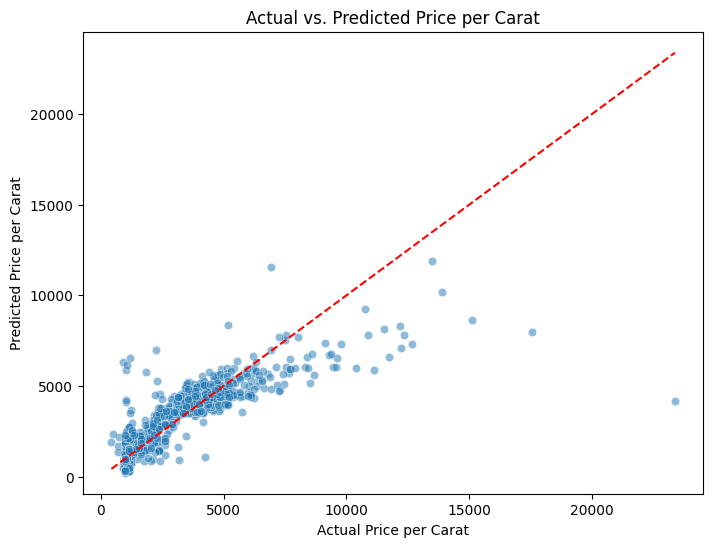

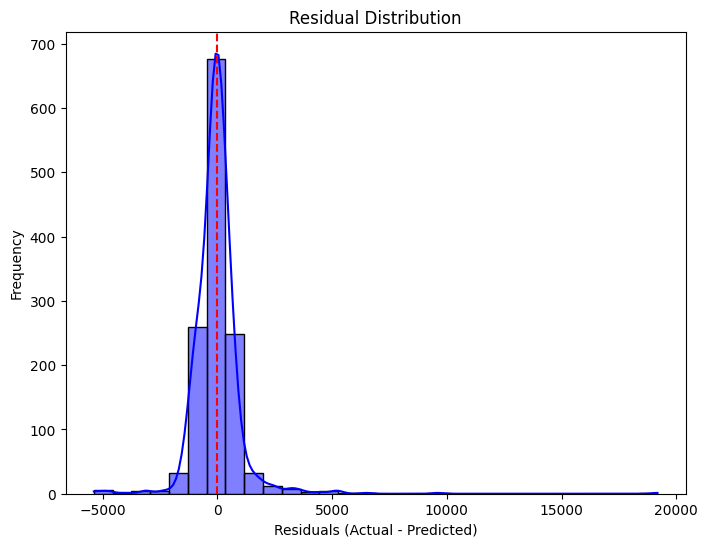

In [ ]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_tuned, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")  # Perfect prediction line
plt.xlabel("Actual Price per Carat")
plt.ylabel("Predicted Price per Carat")
plt.title("Actual vs. Predicted Price per Carat")
plt.show()

# Residual plot (errors between actual and predicted values)
residuals = y_test - y_pred_tuned

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color="blue")
plt.axvline(x=0, color="red", linestyle="--")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()


### <a id='toc1_2_6_'></a>[Linear Regression With Polynomial Interaction Terms](#toc0_)

#### <a id='toc1_2_6_1_'></a>[Between Numerical Only](#toc0_)

**Train first model**

In [37]:
# Generate polynomial interaction terms
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train model with default settings
model = Ridge()  # You can change to LinearRegression() or Lasso() if preferred
model.fit(X_train_poly, y_train)

# Predict on test set
y_pred = model.predict(X_test_poly)


first_linear_pol_num = evaluate_model_performance(y_test,y_pred)



Test MSE: 767584.2060
MAE: 363.7817
RMSE: 876.1188
R²: 0.8263
MAPE: 0.1385


**Tune and validate model**

In [38]:
# Generate polynomial interaction terms
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Define models and corresponding parameter grids
# models = {
#     "LinearRegression": (LinearRegression(), {"fit_intercept": [True, False], "positive": [True, False]}),
#     "Ridge": (Ridge(), {"fit_intercept": [True, False], "positive": [True, False], "alpha": [0.01, 0.1, 1.0, 10.0, 100.0]}),
#     "Lasso": (Lasso(), {"fit_intercept": [True, False], "alpha": [0.01, 0.1, 1.0, 10.0, 100.0]})
# }

# best_model = None
# best_params = None
# best_score = float("inf")

# Iterate through models and perform GridSearchCV
# for name, (model, params) in models.items():
#     grid_search = GridSearchCV(model, param_grid=params, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
#     grid_search.fit(X_train_poly, y_train)
    
#     # Check if the current model is better
#     if -grid_search.best_score_ < best_score:
#         best_model = grid_search.best_estimator_
#         best_params = grid_search.best_params_
#         best_score = -grid_search.best_score_

# Commented out results for GridSearchCV to avoid unnecessary running times
best_params = {'alpha': 1.0, 'fit_intercept': True}
best_model = Lasso(alpha=best_params['alpha'], fit_intercept=best_params['fit_intercept'])

# Fit the model with the best parameters
best_model.fit(X_train_poly, y_train)

# Evaluate on test set
y_pred_tuned = best_model.predict(X_test_poly)

print(f"Best Model: {best_model}\nBest Parameters: {best_params}")

tuned_linear_pol_num = evaluate_model_performance(y_test, y_pred_tuned)

Best Model: Lasso()
Best Parameters: {'alpha': 1.0, 'fit_intercept': True}
Test MSE: 737943.4072
MAE: 334.0006
RMSE: 859.0363
R²: 0.8330
MAPE: 0.1273


c:\Users\jakob\anaconda3\envs\adpro\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.993e+06, tolerance: 2.185e+06
  model = cd_fast.enet_coordinate_descent(


**Plot Actual vs. Predicted Price & Residuals**

Best Parameters: {'alpha': 1.0, 'fit_intercept': True} (NOT FOR MAPE)


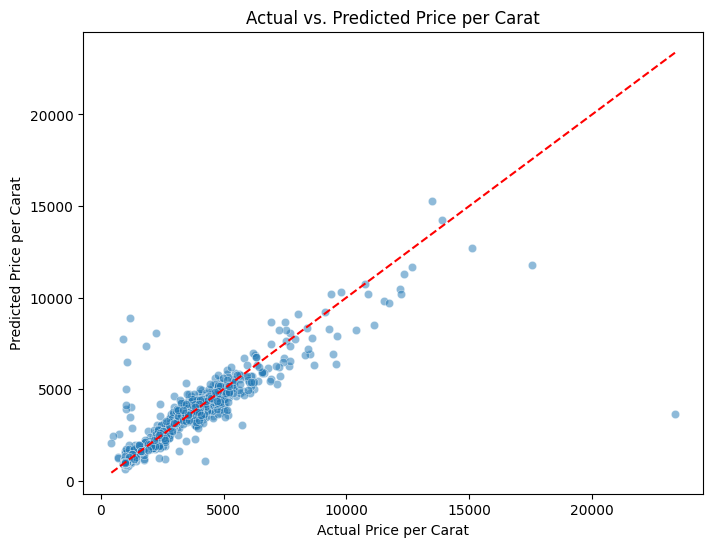

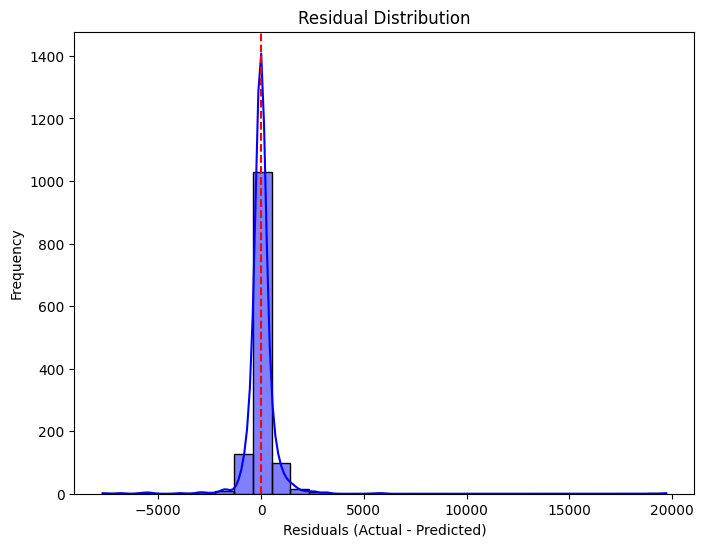

In [ ]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_tuned, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")  # Perfect prediction line
plt.xlabel("Actual Price per Carat")
plt.ylabel("Predicted Price per Carat")
plt.title("Actual vs. Predicted Price per Carat")
plt.show()

# Residual plot (errors between actual and predicted values)
residuals = y_test - y_pred_tuned

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color="blue")
plt.axvline(x=0, color="red", linestyle="--")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

#### <a id='toc1_2_6_2_'></a>[Between Numerical and Categorical](#toc0_)

**Create Interactions**

In [40]:
# Generate polynomial interaction terms for numerical features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_num_poly = poly.fit_transform(X_train[numerical_features])
X_test_num_poly = poly.transform(X_test[numerical_features])

# Convert to DataFrame
num_poly_df_train = pd.DataFrame(X_train_num_poly, columns=poly.get_feature_names_out(numerical_features), index=X_train.index)
num_poly_df_test = pd.DataFrame(X_test_num_poly, columns=poly.get_feature_names_out(numerical_features), index=X_test.index)

# Create interactions between categorical and numerical features
interaction_terms_train = []
interaction_terms_test = []

for cat_col in encoded_df.columns:
    for num_col in num_poly_df_train.columns:
        interaction_terms_train.append(X_train[cat_col] * num_poly_df_train[num_col])
        interaction_terms_test.append(X_test[cat_col] * num_poly_df_test[num_col])

# Convert interaction terms to DataFrame
interaction_df_train = pd.DataFrame(
    np.array(interaction_terms_train).T,
    columns=[f"{cat_col}*{num_col}" for cat_col in encoded_df.columns for num_col in num_poly_df_train.columns],
    index=X_train.index
)

interaction_df_test = pd.DataFrame(
    np.array(interaction_terms_test).T,
    columns=[f"{cat_col}*{num_col}" for cat_col in encoded_df.columns for num_col in num_poly_df_train.columns],
    index=X_test.index
)

# Combine everything
X_train_final = pd.concat([num_poly_df_train, encoded_df.loc[X_train.index], interaction_df_train], axis=1)
X_test_final = pd.concat([num_poly_df_test, encoded_df.loc[X_test.index], interaction_df_test], axis=1)


**Train first model**

In [41]:
# Train default model
model = Ridge()  # You can change this to LinearRegression() or Lasso()
model.fit(X_train_final, y_train)

# Predict on test set
y_pred = model.predict(X_test_final)

# Output
print("Model:", model)

first_linear_pol_numcat = evaluate_model_performance(y_test,y_pred)

Model: Ridge()
Test MSE: 1149192.4343
MAE: 409.5169
RMSE: 1072.0039
R²: 0.7399
MAPE: 0.1526


**Tune and validate model**

In [42]:
# Define models and corresponding parameter grids
# models = {
#     "LinearRegression": (LinearRegression(), {"fit_intercept": [True, False], "positive": [True, False]}),
#     "Ridge": (Ridge(), {"fit_intercept": [True, False], "positive": [True, False], "alpha": [0.01, 0.1, 1.0, 10.0, 100.0]}),
#     "Lasso": (Lasso(), {"fit_intercept": [True, False], "alpha": [0.01, 0.1, 1.0, 10.0, 100.0]})
# }

# best_model = None
# best_params = None
# best_score = float("inf")

# Iterate through models and perform GridSearchCV
# for name, (model, params) in models.items():
#     grid_search = GridSearchCV(model, param_grid=params, cv=5, scoring="neg_mean_absolute_percentage_error", n_jobs=-1, verbose=1)
#     grid_search.fit(X_train_final, y_train)
    
#     # Check if the current model is better
#     if -grid_search.best_score_ < best_score:
#         best_model = grid_search.best_estimator_
#         best_params = grid_search.best_params_
#         best_score = -grid_search.best_score_

# Best Model: Lasso(fit_intercept=False)
best_params = {'alpha': 1.0, 'fit_intercept': False}
best_model = Lasso(alpha=best_params['alpha'], fit_intercept=best_params['fit_intercept'])

# Fit the model with the best parameters
best_model.fit(X_train_final, y_train)

# Predict on test set
y_pred_tuned = best_model.predict(X_test_final)

print(f"Best Model: {best_model}\nBest Parameters: {best_params}")

tuned_linear_pol_num = evaluate_model_performance(y_test, y_pred_tuned)

Best Model: Lasso(fit_intercept=False)
Best Parameters: {'alpha': 1.0, 'fit_intercept': False}
Test MSE: 846040.0152
MAE: 370.2119
RMSE: 919.8043
R²: 0.8085
MAPE: 0.1457


c:\Users\jakob\anaconda3\envs\adpro\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.018e+08, tolerance: 6.562e+06
  model = cd_fast.enet_coordinate_descent(


Best Parameters: {'alpha': 10.0, 'fit_intercept': False}


**Plot Actual vs. Predicted Price & Residuals**

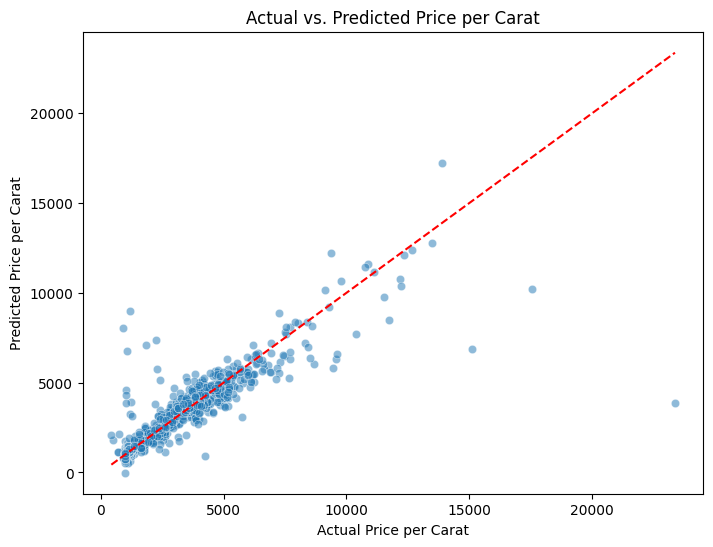

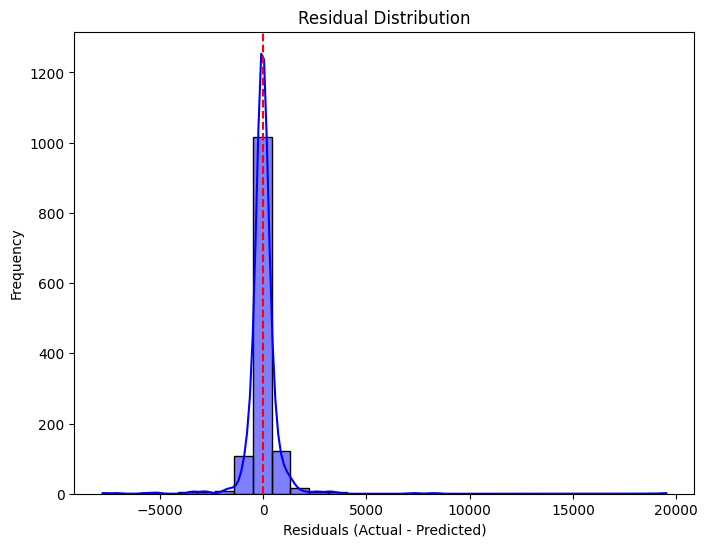

Out-of-Sample R²: 0.8085305911085379


In [ ]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_tuned, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")  # Perfect prediction line
plt.xlabel("Actual Price per Carat")
plt.ylabel("Predicted Price per Carat")
plt.title("Actual vs. Predicted Price per Carat")
plt.show()

# Residual plot (errors between actual and predicted values)
residuals = y_test - y_pred_tuned

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color="blue")
plt.axvline(x=0, color="red", linestyle="--")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()


# Compute R-squared (Out-of-Sample)
r2_oos = r2_score(y_test, y_pred_tuned)

print("Out-of-Sample R²:", r2_oos)


## <a id='toc1_3_'></a>[3 Second Model: Random Forrest](#toc0_)

### <a id='toc1_3_1_'></a>[Create and transform new dataset](#toc0_)

In [ ]:
# Create a new DataFrame for Random Forest (drop 'Price', target = 'Price per Carat')
df_rand = df.drop(columns=["Price"]).copy()

# Define features and target
X_rand = df_rand.drop(columns=["Price per Carat"])
y_rand = df_rand["Price per Carat"]

# Identify categorical and numerical features
categorical_features = X_rand.select_dtypes(include=["object"]).columns.tolist()
numerical_features = X_rand.select_dtypes(include=["number"]).columns.tolist()

# Standardize numerical features
scaler = StandardScaler()
X_rand[numerical_features] = scaler.fit_transform(X_rand[numerical_features])

# One-hot encode categorical features
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
X_rand_encoded = encoder.fit_transform(X_rand[categorical_features])

# Convert encoded categorical features to DataFrame
encoded_df = pd.DataFrame(X_rand_encoded, columns=encoder.get_feature_names_out(categorical_features), index=X_rand.index)

# Drop original categorical columns and concatenate encoded ones
X_rand = X_rand.drop(columns=categorical_features)
X_rand = pd.concat([X_rand, encoded_df], axis=1)

# Split data into training and test sets
X_rand_train, X_rand_test, y_rand_train, y_rand_test = train_test_split(X_rand, y_rand, test_size=0.2, random_state=42)

### <a id='toc1_3_2_'></a>[Without Feature Selection](#toc0_)

#### <a id='toc1_3_2_1_'></a>[Train first model](#toc0_)

In [ ]:
# Train default model
rf_default = RandomForestRegressor(random_state=42)
rf_default.fit(X_rand_train, y_rand_train)

# Predict
y_rand_pred = rf_default.predict(X_rand_test)

# Evaluate
first_rand = evaluate_model_performance(y_rand_test, y_rand_pred)

Test MSE: 771399.2933
MAE: 318.1155
RMSE: 878.2934
R²: 0.8254
MAPE: 0.1117


#### <a id='toc1_3_2_2_'></a>[Tune and validate model](#toc0_)

In [ ]:
# Define hyperparameter grid
# param_grid = {
#     'n_estimators': [30, 50, 70],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 3, 4],
#     'min_samples_leaf': [1, 5, 10]
# }

# Grid search
# rf = RandomForestRegressor(random_state=42)
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
#                            cv=5, scoring='neg_mean_absolute_percentage_error',
#                            n_jobs=-1, verbose=2)

# grid_search.fit(X_rand_train, y_rand_train)
# best_rf = grid_search.best_estimator_

# Best Parameters: {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 50}
best_params = {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 50}

# Use the best parameters directly
best_rf = RandomForestRegressor(
    random_state=42,
    max_depth=best_params['max_depth'],
    min_samples_leaf=best_params['min_samples_leaf'],
    min_samples_split=best_params['min_samples_split'],
    n_estimators=best_params['n_estimators']
)

# Fit the model with the best parameters
best_rf.fit(X_rand_train, y_rand_train)

# Predict with best model
y_rand_pred_tuned = best_rf.predict(X_rand_test)

# Print best hyperparameters
print("Best Parameters:", best_params)

# Evaluate
tuned_rand = evaluate_model_performance(y_rand_test, y_rand_pred_tuned)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 50}
Test MSE: 743970.6205
MAE: 311.0928
RMSE: 862.5373
R²: 0.8316
MAPE: 0.1084


#### <a id='toc1_3_2_3_'></a>[Plot Actual vs. Predicted Price & Residuals](#toc0_)

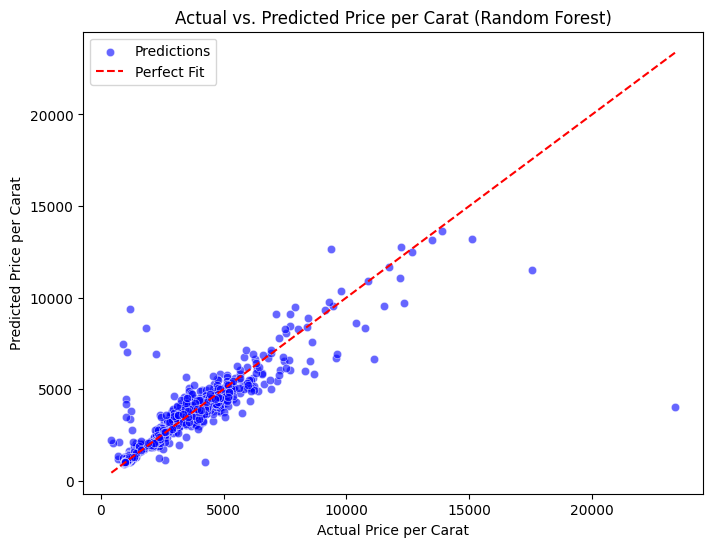

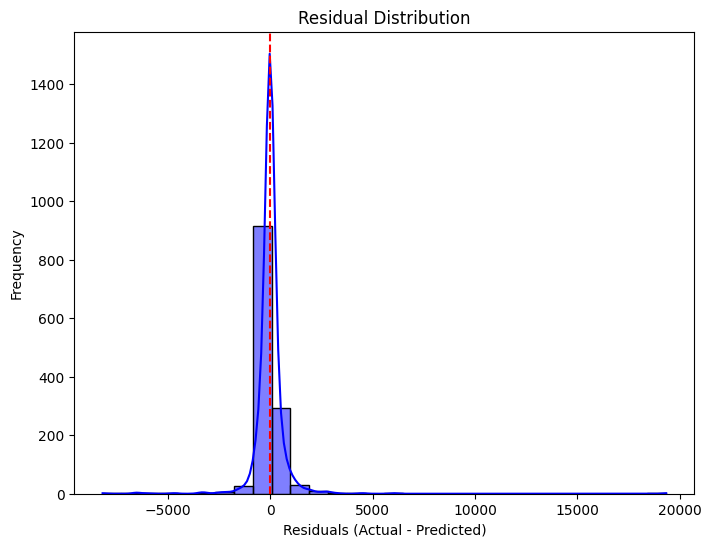

In [ ]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_rand_test, y=y_rand_pred_tuned, alpha=0.6, color="blue", label="Predictions")

# Plot a perfect prediction reference line (y = x)
plt.plot([min(y_rand_test), max(y_rand_test)], [min(y_rand_test), max(y_rand_test)], 
         linestyle="--", color="red", label="Perfect Fit")

# Labels and title
plt.xlabel("Actual Price per Carat")
plt.ylabel("Predicted Price per Carat")
plt.title("Actual vs. Predicted Price per Carat (Random Forest)")
plt.legend()
plt.show()

# Residual plot (errors between actual and predicted values)
residuals = y_rand_test - y_rand_pred_tuned

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color="blue")
plt.axvline(x=0, color="red", linestyle="--")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

### <a id='toc1_3_3_'></a>[With Feature Selection](#toc0_)

#### <a id='toc1_3_3_1_'></a>[Select features automatically and create new subset](#toc0_)

                         Feature  Importance
48                      Type_GIA    0.593549
4                         Length    0.210456
0                   Carat Weight    0.031004
11                Shape_Marquise    0.028086
5                          Width    0.024606
2                        Depth %    0.023533
6                         Height    0.021400
18                       Color_D    0.008584
22                       Color_H    0.008500
1             Length/Width Ratio    0.006117
26                   Clarity_VS2    0.005304
3                        Table %    0.004556
24                    Clarity_IF    0.004302
8         Shape_Cushion Modified    0.004005
27                  Clarity_VVS1    0.003768
53  Fluorescence_No Fluorescence    0.003310
9                  Shape_Emerald    0.002430
25                   Clarity_VS1    0.001817
28                  Clarity_VVS2    0.001519
14                Shape_Princess    0.001289
19                       Color_E    0.001286
32        

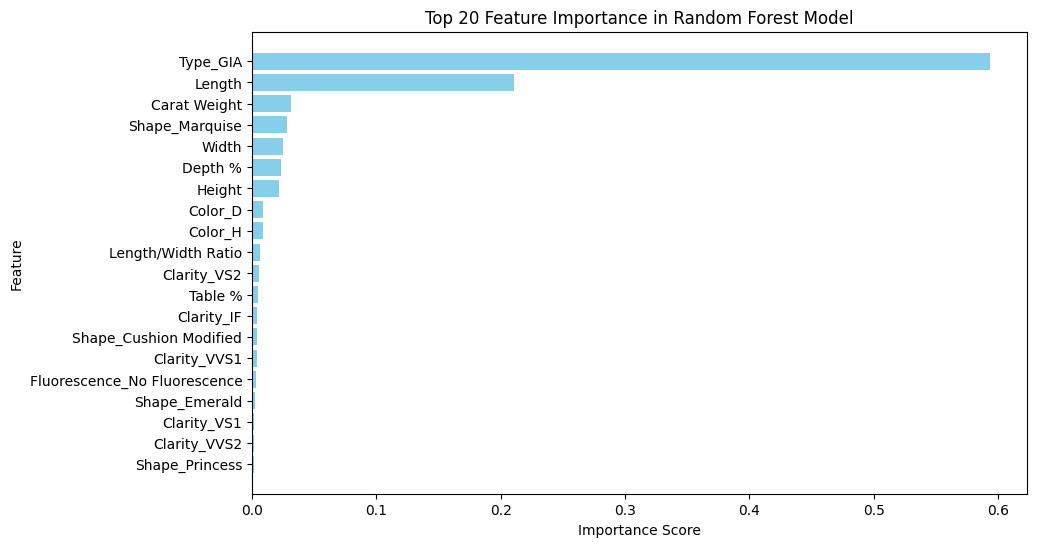

In [ ]:
top_n = 20

# Extract feature importance
feature_importances = best_rf.feature_importances_

# Create full feature importance DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X_rand.columns,
    'Importance': feature_importances
}).sort_values(by="Importance", ascending=False)

# Display full sorted list
print(feature_importance_df)

# Get top N feature names
top_features = feature_importance_df.head(top_n)["Feature"]

# Subset data to top N features
X_rand_train_top = X_rand_train[top_features]
X_rand_test_top = X_rand_test[top_features]

# Plot top N features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df.head(top_n)["Feature"], feature_importance_df.head(top_n)["Importance"], color="skyblue")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title(f"Top {top_n} Feature Importance in Random Forest Model")
plt.gca().invert_yaxis()
plt.show()


#### <a id='toc1_3_3_2_'></a>[Train first model](#toc0_)

In [ ]:
# Train the model with top features
best_rf.fit(X_rand_train_top, y_rand_train)

# Make predictions on the test set
y_rand_pred_top = best_rf.predict(X_rand_test_top)

fist_rand_top = evaluate_model_performance(y_rand_test, y_rand_pred_top)


Test MSE: 772397.3930
MAE: 326.5168
RMSE: 878.8614
R²: 0.8252
MAPE: 0.1141


#### <a id='toc1_3_3_3_'></a>[Tune and validate model](#toc0_)

In [ ]:
# Define hyperparameter grid
# param_grid = {
#     'n_estimators': [30, 50, 70],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 3, 4],
#     'min_samples_leaf': [1, 5, 10]
# }

# Grid search
# rf = RandomForestRegressor(random_state=42)
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
#                            cv=5, scoring='neg_mean_absolute_percentage_error',
#                            n_jobs=-1, verbose=2)

# Use the best parameters directly
best_params = {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 50}
best_rf = RandomForestRegressor(
    random_state=42,
    max_depth=best_params['max_depth'],
    min_samples_leaf=best_params['min_samples_leaf'],
    min_samples_split=best_params['min_samples_split'],
    n_estimators=best_params['n_estimators']
)

# Fit the model with the best parameters
best_rf.fit(X_rand_train_top, y_rand_train)

# Predict with best model
y_rand_pred_top_tuned = best_rf.predict(X_rand_test_top)

# Print best hyperparameters
print("Best Parameters:", best_params)

# Evaluate
tuned_rand_top = evaluate_model_performance(y_rand_test, y_rand_pred_top_tuned)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 50}
Test MSE: 772397.3930
MAE: 326.5168
RMSE: 878.8614
R²: 0.8252
MAPE: 0.1141


#### <a id='toc1_3_3_4_'></a>[Plot Actual vs. Predicted Price & Residuals](#toc0_)

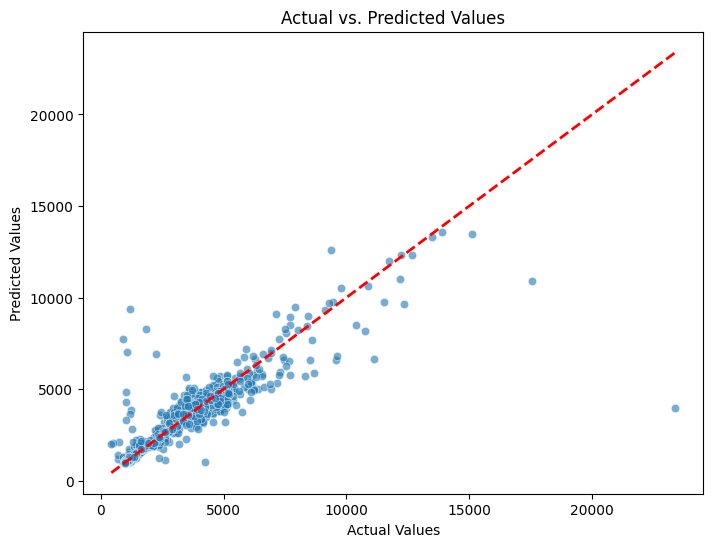

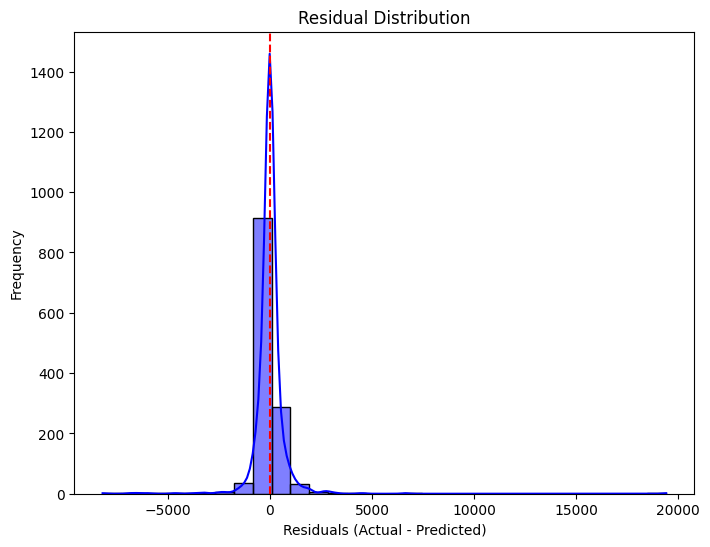

In [ ]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_rand_test, y=y_rand_pred_top_tuned, alpha=0.6)

# Add a reference line (perfect predictions)
plt.plot([y_rand_test.min(), y_rand_test.max()], [y_rand_test.min(), y_rand_test.max()], 'r--', lw=2)

# Labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

# Residual plot (errors between actual and predicted values)
residuals = y_rand_test - y_rand_pred_top_tuned

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color="blue")
plt.axvline(x=0, color="red", linestyle="--")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

## <a id='toc1_4_'></a>[4 Comparing the Models Performances](#toc0_)

In [52]:
# Define "first" models
first_models = {
    "Linear": first_linear,
    "Polynomial (Num)": first_linear_pol_num,
    "Polynomial (Num+Cat)": first_linear_pol_numcat,
    "Random Forest": first_rand,
    "Random Forest (Top 10)": fist_rand_top
}

# Define "tuned" models
tuned_models = {
    "Linear (Tuned)": tuned_linear,
    "Polynomial (Num, Tuned)": tuned_linear_pol_num,
    "Polynomial (Num+Cat, Tuned)": tuned_linear_pol_num,
    "Random Forest (Tuned)": tuned_rand,
    "Random Forest (Top 10, Tuned)": tuned_rand_top
}

# Create DataFrames for comparison
df_first = pd.DataFrame(first_models).T  # Transpose to have models as rows
df_tuned = pd.DataFrame(tuned_models).T

# Display tables
print("📊 First Models Performance:\n")
display(df_first)

print("\n📈 Tuned Models Performance:\n")
display(df_tuned)


📊 First Models Performance:



MSE         MAE         RMSE        R²  \
Linear                  1.062054e+06  572.682175  1030.560273  0.759644   
Polynomial (Num)        7.675842e+05  363.781747   876.118831  0.826286   
Polynomial (Num+Cat)    1.149192e+06  409.516901  1072.003934  0.739923   
Random Forest           7.713993e+05  318.115480   878.293398  0.825423   
Random Forest (Top 10)  7.723974e+05  326.516796   878.861419  0.825197   

                            MAPE  
Linear                  0.272492  
Polynomial (Num)        0.138487  
Polynomial (Num+Cat)    0.152584  
Random Forest           0.111748  
Random Forest (Top 10)  0.114127


📈 Tuned Models Performance:



MSE         MAE         RMSE  \
Linear (Tuned)                 1.186730e+06  595.197523  1089.371457   
Polynomial (Num, Tuned)        8.460400e+05  370.211909   919.804335   
Polynomial (Num+Cat, Tuned)    8.460400e+05  370.211909   919.804335   
Random Forest (Tuned)          7.439706e+05  311.092826   862.537315   
Random Forest (Top 10, Tuned)  7.723974e+05  326.516796   878.861419   

                                     R²      MAPE  
Linear (Tuned)                 0.731428  0.266556  
Polynomial (Num, Tuned)        0.808531  0.145728  
Polynomial (Num+Cat, Tuned)    0.808531  0.145728  
Random Forest (Tuned)          0.831630  0.108365  
Random Forest (Top 10, Tuned)  0.825197  0.114127